# Image Classification
**Created by Akmal Muzakki Bakir on 18/07/2023**

## Imported Libraries

In [41]:
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import time

from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

## Prepare Dataset

In [42]:
# Extract zip file
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [43]:
# Load dataset
paper = os.path.join('rockpaperscissors', 'paper')
rock = os.path.join('rockpaperscissors', 'rock')
scissors = os.path.join('rockpaperscissors', 'scissors')

print('Total paper images :', len(os.listdir(paper)))
print('Total rock images :', len(os.listdir(rock)))
print('Total scissors images :', len(os.listdir(scissors)))

Total paper images : 712
Total rock images : 726
Total scissors images : 750


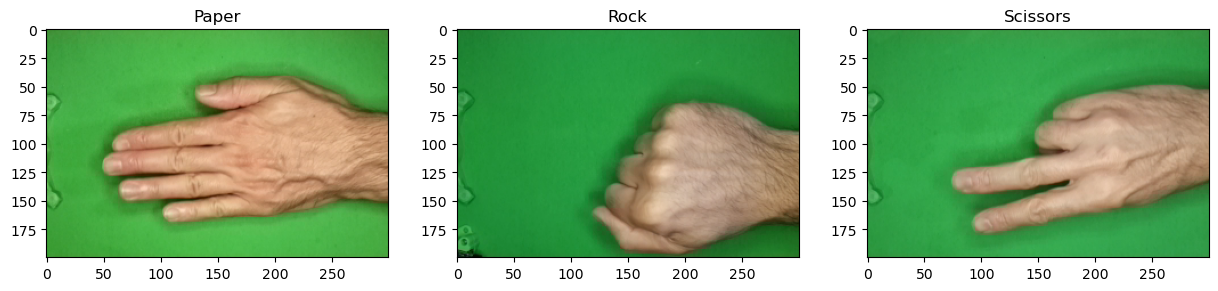

In [44]:
# View images from each class
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(mpimg.imread(os.path.join(paper, os.listdir(paper)[0])))
ax[0].set_title('Paper')
ax[1].imshow(mpimg.imread(os.path.join(rock, os.listdir(rock)[0])))
ax[1].set_title('Rock')
ax[2].imshow(mpimg.imread(os.path.join(scissors, os.listdir(scissors)[0])))
ax[2].set_title('Scissors')
plt.show()

## Create Augmented Dataset and Split into Train and Validation Set

In [45]:
# Create image data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.4
)

In [46]:
# Create train set
train_generator = train_datagen.flow_from_directory(
    'rockpaperscissors/rps-cv-images',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 1314 images belonging to 3 classes.


In [47]:
# Create validation set
validation_generator = train_datagen.flow_from_directory(
    'rockpaperscissors/rps-cv-images',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 874 images belonging to 3 classes.


In [48]:
# View class indices
print(train_generator.class_indices)
print(validation_generator.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}
{'paper': 0, 'rock': 1, 'scissors': 2}


## Build ANN Model

In [49]:
# Create model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(), # flatten the output from convolutional layers
    tf.keras.layers.Dropout(0.5), # dropout 50% of neurons

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') # output 3 classes
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [50]:
# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

In [51]:
# Train model using 50 epochs
start_time = time.time()
history = model.fit(
    train_generator,
    steps_per_epoch=5,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2
)
print('Time elapsed :', time.time() - start_time, 'seconds')

Epoch 1/50
5/5 - 11s - loss: 1.1994 - accuracy: 0.3562 - val_loss: 1.1060 - val_accuracy: 0.3875 - 11s/epoch - 2s/step
Epoch 2/50
5/5 - 8s - loss: 1.0991 - accuracy: 0.4000 - val_loss: 1.0867 - val_accuracy: 0.3938 - 8s/epoch - 2s/step
Epoch 3/50
5/5 - 7s - loss: 1.0644 - accuracy: 0.4692 - val_loss: 1.0501 - val_accuracy: 0.4187 - 7s/epoch - 1s/step
Epoch 4/50
5/5 - 7s - loss: 1.0481 - accuracy: 0.4000 - val_loss: 1.0098 - val_accuracy: 0.4437 - 7s/epoch - 1s/step
Epoch 5/50
5/5 - 7s - loss: 0.9960 - accuracy: 0.4812 - val_loss: 0.9419 - val_accuracy: 0.6313 - 7s/epoch - 1s/step
Epoch 6/50
5/5 - 7s - loss: 0.9457 - accuracy: 0.5437 - val_loss: 0.8919 - val_accuracy: 0.6812 - 7s/epoch - 1s/step
Epoch 7/50
5/5 - 6s - loss: 0.8612 - accuracy: 0.6231 - val_loss: 0.8913 - val_accuracy: 0.5750 - 6s/epoch - 1s/step
Epoch 8/50
5/5 - 6s - loss: 0.8745 - accuracy: 0.6438 - val_loss: 0.8009 - val_accuracy: 0.6625 - 6s/epoch - 1s/step
Epoch 9/50
5/5 - 6s - loss: 0.7139 - accuracy: 0.7000 - val_lo

Kita dapat menyimpulkan, bahwa hanya dengan 50 epochs, model sudah mendapatkan akurasi yang cukup baik, yaitu 91.25% pada data training dan 93.12% pada data validation.

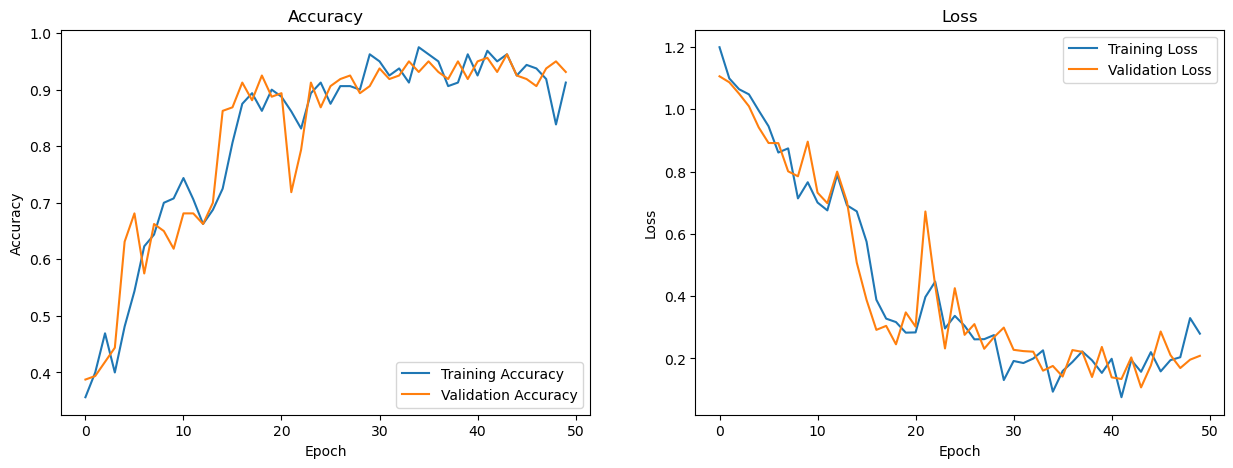

In [52]:
# Plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(history.history['accuracy'], label='Training Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].plot(history.history['loss'], label='Training Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[0].legend(loc='lower right')
ax[1].legend(loc='upper right')
plt.show()

## Predict Image (Testing)

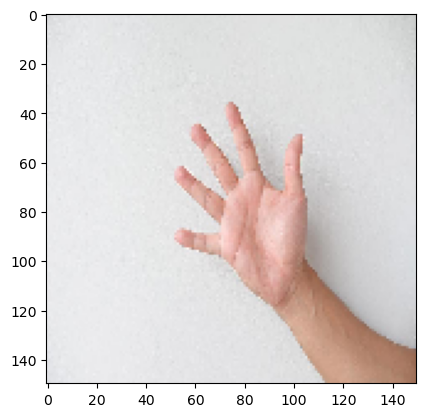

In [79]:
# Load image
img = image.load_img('paper.jpg', target_size=(150, 150))
imgplot = plt.imshow(img)
plt.show()

In [82]:
# Convert image to array
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
images.shape

(1, 150, 150, 3)

In [83]:
# Predict image
classes = model.predict(images, batch_size=10)

if classes[0][0] == 1:
    print('Paper')
elif classes[0][1] == 1:
    print('Rock')
else:
    print('Scissors')

1/1 [==============================] - 0s 37ms/step
Paper


Kita dapat melihat bahwa model dapat memprediksi gambar kertas dengan benar.

# Image Classification using Callbacks

In [56]:
# Create callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.96 and logs.get('val_accuracy') > 0.96:
            print('\nAccuracy and val_accuracy has reached > 96%!')
            self.model.stop_training = True

callbacks = myCallback()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 17, 17, 128)     

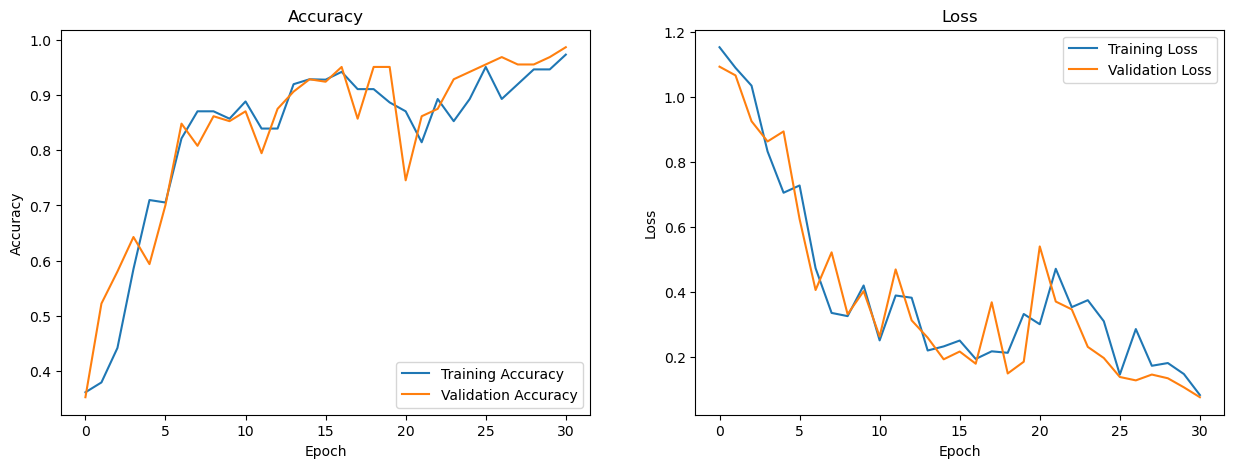

In [57]:
# Build model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(), # flatten the output from convolutional layers
    tf.keras.layers.Dropout(0.5), # dropout 50% of neurons

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') # output 3 classes
])
model.summary()

# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

# Train model using 70 epochs
start_time = time.time()
history = model.fit(
    train_generator,
    steps_per_epoch=7,
    epochs=70,
    validation_data=validation_generator,
    validation_steps=7,
    verbose=2,
    callbacks=[callbacks]
)
print('Time elapsed :', time.time() - start_time, 'seconds')

# Plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(history.history['accuracy'], label='Training Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].plot(history.history['loss'], label='Training Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[0].legend(loc='lower right')
ax[1].legend(loc='upper right')
plt.show()

Kita dapat menyimpulkan, bahwa dengan menggunakan callback, model sudah mendapatkan akurasi yang cukup baik, yaitu diatas 96% pada data training dan data validation.